In [1]:
import pandas as pd
import numpy as np

import sklearn 

from numpy import mean
from numpy import std

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBRegressor
#from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import make_scorer

from matplotlib import pyplot
import seaborn as sns


In [2]:
# Basic Dummified Dataset for Linear Models
base = pd.read_csv('../Data/BaseData.csv')
base.shape

(2580, 299)

In [3]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

scaler = StandardScaler()
X = scaler.fit_transform(X)
#y=np.log10(y)

In [4]:
# list of penalized regression models to evaluate

def get_models():
    models = dict()
    models['ridge'] = Ridge() 
    models['lasso'] = Lasso() 
    models['elastic_net'] = ElasticNet()
    return models


In [5]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'}

In [6]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [7]:
models = get_models()

In [8]:
#Create List of Dictionaries to evalute models

dfs = list()

for name, model in models.items():
    
    # evaluate the model
    df = evaluate_model(model, X, y)
    dfs.append(df)
    

In [9]:
dfs

[    fit_time  score_time   test_r2  test_neg_mae
 0   0.032694    0.004381  0.906156 -15376.607522
 1   0.032837    0.001057  0.858142 -14672.309750
 2   0.039879    0.001057  0.776891 -17184.203865
 3   0.037609    0.001146  0.921214 -14480.647001
 4   0.042831    0.001097  0.943580 -12824.545009
 5   0.029393    0.001620  0.916161 -14494.716153
 6   0.022198    0.000800  0.883612 -15133.077860
 7   0.020491    0.000788  0.924137 -13854.460273
 8   0.031372    0.000635  0.926227 -13836.641839
 9   0.028034    0.000588  0.867561 -16055.947509
 10  0.028084    0.000579  0.916191 -13822.782240
 11  0.023750    0.000531  0.907616 -15858.783421
 12  0.030940    0.000655  0.804948 -15650.059417
 13  0.018649    0.000703  0.911533 -14813.468481
 14  0.020066    0.000746  0.921107 -14482.613669,
     fit_time  score_time   test_r2  test_neg_mae
 0   0.817402    0.000889  0.910397 -15230.183397
 1   0.783750    0.002220  0.858058 -14666.133563
 2   0.741482    0.000979  0.776718 -17195.780116

In [10]:
ridge_df = dfs[0][['test_r2', 'test_neg_mae']]
ridge_df = ridge_df.assign(MAE = ridge_df['test_neg_mae'].abs())
ridge_df = ridge_df.rename(columns = {'test_r2':'Ridge R2', 'MAE':'Ridge MAE'})
ridge_df

,Ridge R2,test_neg_mae,Ridge MAE
0,0.906156,-15376.607522,15376.607522
1,0.858142,-14672.309750,14672.309750
2,0.776891,-17184.203865,17184.203865
3,0.921214,-14480.647001,14480.647001
4,0.943580,-12824.545009,12824.545009
5,0.916161,-14494.716153,14494.716153
6,0.883612,-15133.077860,15133.077860
7,0.924137,-13854.460273,13854.460273
8,0.926227,-13836.641839,13836.641839
9,0.867561,-16055.947509,16055.947509


In [11]:
lasso_df = dfs[1][['test_r2', 'test_neg_mae']]
lasso_df = lasso_df.assign(MAE = lasso_df['test_neg_mae'].abs())
lasso_df = lasso_df.rename(columns = {'test_r2':'Lasso R2', 'MAE':'Lasso MAE'})
lasso_df

,Lasso R2,test_neg_mae,Lasso MAE
0,0.910397,-15230.183397,15230.183397
1,0.858058,-14666.133563,14666.133563
2,0.776718,-17195.780116,17195.780116
3,0.921019,-14494.860341,14494.860341
4,0.943484,-12826.270326,12826.270326
5,0.913674,-14629.245630,14629.245630
6,0.883100,-15165.991946,15165.991946
7,0.925741,-13760.367263,13760.367263
8,0.926025,-13841.237404,13841.237404
9,0.867581,-16054.334009,16054.334009


In [12]:
elastic_df = dfs[2][['test_r2', 'test_neg_mae']]
elastic_df = elastic_df.assign(MAE = elastic_df['test_neg_mae'].abs())
elastic_df = elastic_df.rename(columns = {'test_r2':'Elastic R2', 'MAE':'Elastic MAE'})
elastic_df

,Elastic R2,test_neg_mae,Elastic MAE
0,0.896392,-15353.656312,15353.656312
1,0.846335,-16215.814923,16215.814923
2,0.853597,-17098.447588,17098.447588
3,0.892892,-14877.277738,14877.277738
4,0.922586,-14313.722229,14313.722229
5,0.908367,-15242.027300,15242.027300
6,0.880145,-15477.154800,15477.154800
7,0.904727,-14244.721481,14244.721481
8,0.905643,-14616.175179,14616.175179
9,0.848205,-17262.752525,17262.752525


In [13]:
box = pd.concat([ridge_df, lasso_df, elastic_df], axis=1)
box

,Ridge R2,test_neg_mae,Ridge MAE,Lasso R2,test_neg_mae,Lasso MAE,Elastic R2,test_neg_mae,Elastic MAE
0,0.906156,-15376.607522,15376.607522,0.910397,-15230.183397,15230.183397,0.896392,-15353.656312,15353.656312
1,0.858142,-14672.309750,14672.309750,0.858058,-14666.133563,14666.133563,0.846335,-16215.814923,16215.814923
2,0.776891,-17184.203865,17184.203865,0.776718,-17195.780116,17195.780116,0.853597,-17098.447588,17098.447588
3,0.921214,-14480.647001,14480.647001,0.921019,-14494.860341,14494.860341,0.892892,-14877.277738,14877.277738
4,0.943580,-12824.545009,12824.545009,0.943484,-12826.270326,12826.270326,0.922586,-14313.722229,14313.722229
5,0.916161,-14494.716153,14494.716153,0.913674,-14629.245630,14629.245630,0.908367,-15242.027300,15242.027300
6,0.883612,-15133.077860,15133.077860,0.883100,-15165.991946,15165.991946,0.880145,-15477.154800,15477.154800
7,0.924137,-13854.460273,13854.460273,0.925741,-13760.367263,13760.367263,0.904727,-14244.721481,14244.721481
8,0.926227,-13836.641839,13836.641839,0.926025,-13841.237404,13841.237404,0.905643,-14616.175179,14616.175179
9,0.867561,-16055.947509,16055.947509,0.867581,-16054.334009,16054.334009,0.848205,-17262.752525,17262.752525


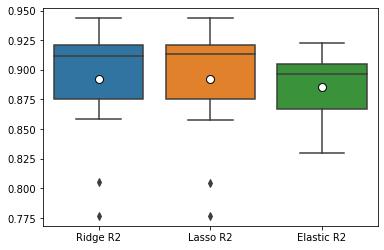

In [14]:
sns.boxplot(data=box[['Ridge R2', 'Lasso R2', 'Elastic R2']], showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});

In [15]:
box.describe()

,Ridge R2,test_neg_mae,Ridge MAE,Lasso R2,test_neg_mae,Lasso MAE,Elastic R2,test_neg_mae,Elastic MAE
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.892338,-14836.057601,14836.057601,0.892672,-14829.700469,14829.700469,0.885294,-15451.997457,15451.997457
std,0.047208,1086.319360,1086.319360,0.047466,1089.394575,1089.394575,0.027827,1012.737638,1012.737638
min,0.776891,-17184.203865,12824.545009,0.776718,-17195.780116,12826.270326,0.829998,-17262.752525,14244.721481
25%,0.875586,-15513.333470,14167.553637,0.875340,-15449.860275,14165.150929,0.866871,-15846.484862,14746.726458
50%,0.911533,-14672.309750,14672.309750,0.913674,-14666.133563,14666.133563,0.896392,-15242.027300,15242.027300
75%,0.921160,-14167.553637,15513.333470,0.921091,-14165.150929,15449.860275,0.905185,-14746.726458,15846.484862
max,0.943580,-12824.545009,17184.203865,0.943484,-12826.270326,17195.780116,0.922586,-14244.721481,17262.752525


In [16]:
box.to_csv('Linear.csv', index=False)

In [17]:
#sklearn.metrics.SCORERS.keys()